## Data Sources

Some of the media bias and factual reporting data were obtained from [Media Bias/Fact Check](https://mediabiasfactcheck.com).  
The data was manually copied for research purposes only.  
All credit for the original content belongs to Media Bias/Fact Check.

Please refer to their website for the latest and complete information.

- Bias Rating   
    - -10 to -8.0: Extreme Left Bias
    - -7.9 to -5.0: Left Bias (Far Left at -7.0+)
    - -4.9 to -2.0: Left-Center Bias
    - -1.9 to +1.9: Least Biased
    - +2.0 to +4.9: Right-Center Bias
    - +5.0 to +7.9: Right Bias (Far Right at +7.0+)
    - +8.0 to +10: Extreme Right Bias


- Factual Reporting
    - 0: Very High – Consistently factual, uses credible information, no failed fact checks.
    - 0.1–1.9: High – High factual, minor sourcing issues, reasonable fact check record
    - 2.0–4.4: Mostly Factual – Generally reliable but may have occasional fact-check failures, transparency, and sourcing issues.
    - 4.5–6.4: Mixed – Reliability varies; multiple fact-check failures, poor sourcing, lack of transparency, one-sidedness.
    - 6.5–8.4: Low – Often unreliable; frequent fact-check failures and significant issues with sourcing, transparency, propaganda, conspiracies, and pseudoscience promotion.
    - 8.5–10: Very Low – Consistently unreliable, heavily biased, with intentional misinformation likely.

In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [20]:
# Source : https://mediabiasfactcheck.com
# Date accessed: July 17, 2025
# Data manually collected for academic research use only.
# All rights to the original content belong to Media Bias/Fact Check.

df = pd.DataFrame({
    "media": ["New York Post","MSN", "Axios", "The Hill", "Daily Mail", "Fox News", "NPR", "CNN", "CBS News", "New York Times", "PBS", "Washington Post", "ABC News", "USA Today", "AP News", "NBC News", "Newsweek", "Politico", "Forbes", "BBC", "The Guardian", "The Independent", "Reuters", "PolitiFact", "Yahoo", "FactCheck.org", "Snopes", "Google", "Truth Social", "X (formerly Twitter)", "Wikipedia", "White House", "Donald J. Trump", "YouTube", "Instagram", "Getty Images"],
    "Bias Rating": [4.9,-2.8, -2.8, 0.4, 6.6, 6.7, -2.8, -3.6, -3.3, -4.1, -2.4, -3.6, -3.3, -2.8, -2.1, -3.6, 2.8, -2.8, 1.3, -2.0, -3.6, -3.6, -0.5, -3.1, -3.3, -0.1, -2.8, np.nan, np.nan, np.nan, 0.0, np.nan, np.nan, np.nan, np.nan, np.nan],
    "Factual Reporting":[5.9, 1.0, 0.9, 2.2, 7.1, 6.1, 0.9, 3.7, 1.0, 1.4, 1.0, 2.1, 1.1, 2.1, 0.8, 1.0, 2.6, 1.3, 2.0, 0.8, 5.9, 5.8, 0.0, 1.0, 1.9, 0.0, 1.2, np.nan, np.nan, np.nan, 5.0, np.nan, np.nan, np.nan, np.nan, np.nan]
})

df.head(5)

,media,Bias Rating,Factual Reporting
0,New York Post,4.9,5.9
1,MSN,-2.8,1.0
2,Axios,-2.8,0.9
3,The Hill,0.4,2.2
4,Daily Mail,6.6,7.1


In [21]:
media_bias_score = pd.read_csv("../data/processed/media_bias_score.csv").rename(columns={"Unnamed: 0": "media"})
helpful_score = pd.read_csv("../data/processed/helpful_score.csv").rename(columns={"fqdn": "media"})

In [22]:
domain_to_name = {
    'www.google.com': 'Google',
    'nypost.com': 'New York Post',
    'www.msn.com': 'MSN',
    'www.axios.com': 'Axios',
    'truthsocial.com': 'Truth Social',
    'thehill.com': 'The Hill',
    'www.dailymail.co.uk': 'Daily Mail',
    'x.com': 'X (formerly Twitter)',
    'www.foxnews.com': 'Fox News',
    'www.npr.org': 'NPR',
    'en.m.wikipedia.org': 'Wikipedia',
    'www.cnn.com': 'CNN',
    'www.cbsnews.com': 'CBS News',
    'www.nytimes.com': 'New York Times',
    'www.pbs.org': 'PBS',
    'www.washingtonpost.com': 'Washington Post',
    'www.whitehouse.gov': 'White House',
    'abcnews.go.com': 'ABC News',
    'www.usatoday.com': 'USA Today',
    'apnews.com': 'AP News',
    'www.nbcnews.com': 'NBC News',
    'www.newsweek.com': 'Newsweek',
    'www.politico.com': 'Politico',
    'www.forbes.com': 'Forbes',
    'www.bbc.com': 'BBC',
    'www.theguardian.com': 'The Guardian',
    'www.donaldjtrump.com': 'Donald J. Trump',
    'www.independent.co.uk': 'The Independent',
    'www.reuters.com': 'Reuters',
    'www.politifact.com': 'PolitiFact',
    'www.youtube.com': 'YouTube',
    'www.yahoo.com': 'Yahoo',
    'www.factcheck.org': 'FactCheck.org',
    'www.snopes.com': 'Snopes',
    'www.instagram.com': 'Instagram',
    'www.gettyimages.com': 'Getty Images',
}



In [23]:
media_bias_score["media"] = media_bias_score["media"].map(domain_to_name)
helpful_score["media"] = helpful_score["media"].map(domain_to_name)

In [24]:
media_bias_merge = pd.merge(media_bias_score[["media", "mean", "total"]], df[["media", "Bias Rating"]], on = "media")
helpful_merge = pd.merge(helpful_score[["media", "mean", "total"]], df[["media", "Factual Reporting"]], on = "media")

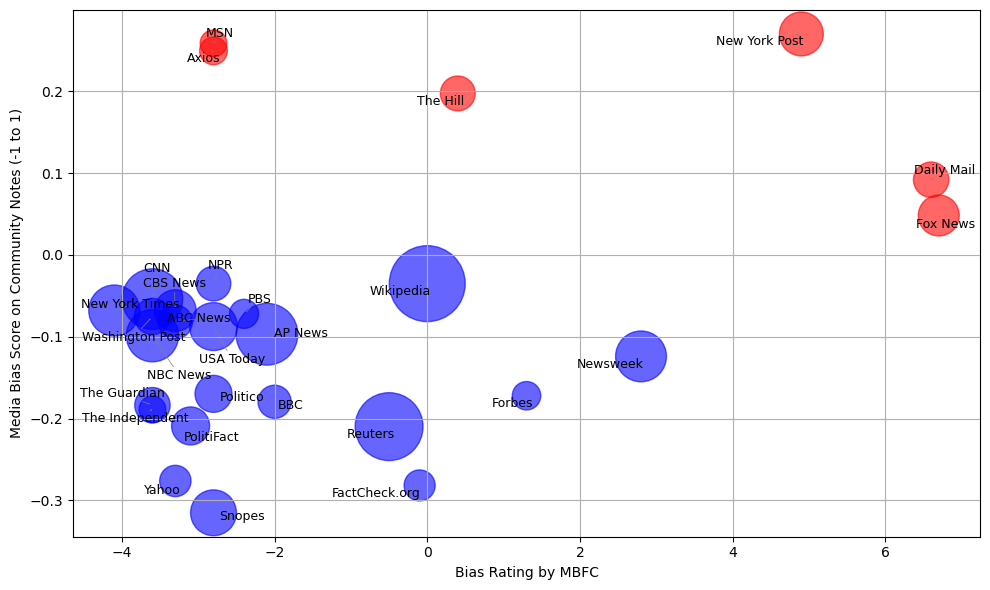

In [25]:
# filter out rows with NaN values in 'Bias Rating' (filter out new media sources not in MBFC dataset)
filtered_df = media_bias_merge[
    media_bias_merge["Bias Rating"].apply(np.isfinite) &
    media_bias_merge["mean"].apply(np.isfinite)
]


colors = filtered_df["mean"].apply(
    lambda x: "red" if x > 0 else ("blue" if x < 0 else "gray")
)


plt.figure(figsize=(10, 6))
plt.scatter(
    filtered_df["Bias Rating"],
    filtered_df["mean"],
    s=filtered_df["total"] * 10,  
    c=colors,
    alpha=0.6
)

texts = []
for i, row in filtered_df.iterrows():
    texts.append(
        plt.text(row["Bias Rating"], row["mean"], row["media"],
                 fontsize=9, ha='center', va='center')
    )

adjust_text(texts,
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            only_move={'points': 'y', 'text': 'y'}) 

plt.ylabel("Media Bias Score on Community Notes (-1 to 1)")
plt.xlabel("Bias Rating by MBFC")
#plt.ylim(-5, 8)
plt.grid(True)
plt.tight_layout()
plt.savefig("../figure/media_bias_comparison.png", dpi = 300)
plt.show()

In [27]:
filtered_df

,media,mean,total,Bias Rating
2,Snopes,-0.315218,109,-2.8
3,FactCheck.org,-0.281778,50,-0.1
4,Yahoo,-0.276325,51,-3.3
6,Reuters,-0.209879,239,-0.5
7,PolitiFact,-0.209035,75,-3.1
8,The Independent,-0.188786,37,-3.6
10,The Guardian,-0.183697,65,-3.6
11,BBC,-0.179471,57,-2.0
12,Forbes,-0.172127,42,1.3
13,Politico,-0.169789,71,-2.8


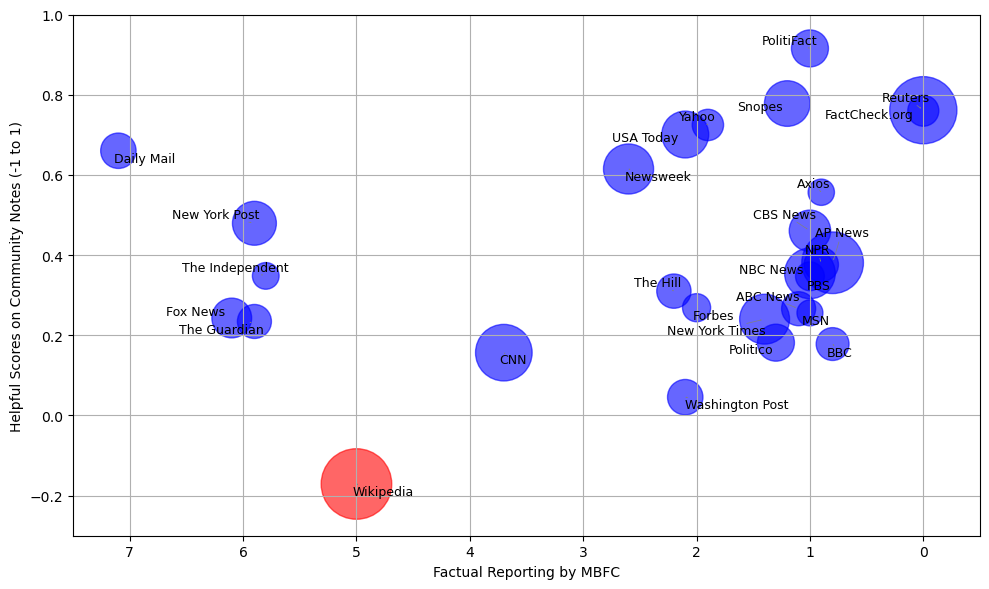

In [12]:
# filter out rows with NaN values in 'Bias Rating' (filter out new media sources not in MBFC dataset)
filtered_df = helpful_merge[
    helpful_merge["mean"].apply(np.isfinite) &
    helpful_merge["Factual Reporting"].apply(np.isfinite)
]


colors = filtered_df["mean"].apply(
    lambda x: "blue" if x > 0 else ("red" if x < 0 else "gray")
)


plt.figure(figsize=(10, 6))
plt.scatter(
    filtered_df["Factual Reporting"],
    filtered_df["mean"],
    s=filtered_df["total"] * 10,  
    c=colors,
    alpha=0.6
)

texts = []
for i, row in filtered_df.iterrows():
    texts.append(
        plt.text(row["Factual Reporting"], row["mean"], row["media"],
                 fontsize=9, ha='center', va='center')
    )

adjust_text(texts,
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            only_move={'points': 'y', 'text': 'y'}) 

plt.ylabel("Helpful Scores on Community Notes (-1 to 1)")
plt.xlabel("Factual Reporting by MBFC")
plt.ylim(-0.3, 1)
plt.xlim(7.5, -0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
import scipy.stats as stats

result = stats.linregress(filtered_df["mean"], -filtered_df["Factual Reporting"])

print(f"slope: {result.slope:.4f}")
print(f"intercept: {result.intercept:.4f}")
print(f"r-value: {result.rvalue:.4f}")
print(f"p-value: {result.pvalue:.4f}")
print(f"stderr: {result.stderr:.4f}")

slope: 2.0066
intercept: -3.1689
r-value: 0.2465
p-value: 0.2060
stderr: 1.5469


In [28]:
def weighted_corr(x, y, w):
    
    mean_x = np.average(x, weights=w)
    mean_y = np.average(y, weights=w)
    
    covariance = np.average((x - mean_x) * (y - mean_y), weights=w)
    

    std_x = np.sqrt(np.average((x - mean_x)**2, weights=w))
    std_y = np.sqrt(np.average((y - mean_y)**2, weights=w))
    

    correlation = covariance / (std_x * std_y)
    
    return correlation


# Calculate the weighted correlation
w_corr = weighted_corr(
    x=filtered_df['mean'],
    y=filtered_df['Bias Rating'],
    w=filtered_df['total']
)

w_corr

0.41265793288109603

In [85]:
# bootstraping method to estimate the confidence interval and p-value
n_bootstraps = 10000 
bootstrap_corrs = []
original_size = len(df)


for _ in range(n_bootstraps):

    bootstrap_sample = filtered_df.sample(n=original_size, replace=True)
    

    corr = weighted_corr(
        x=bootstrap_sample['mean'],
        y=bootstrap_sample['Bias Rating'],
        w=bootstrap_sample['total']
    )
    bootstrap_corrs.append(corr)


alpha = 0.05
lower_bound = np.percentile(bootstrap_corrs, (alpha / 2) * 100)
upper_bound = np.percentile(bootstrap_corrs, (1 - alpha / 2) * 100)


p_value_bootstrap = np.mean(np.array(bootstrap_corrs) * w_corr <= 0) * 2


print(f"weighted correlation: {w_corr:.4f}")
print(f"95% CI: ({lower_bound:.4f}, {upper_bound:.4f})")
print(f"p-value: {p_value_bootstrap:.4f}")


weighted correlation: 0.4127
95% CI: (0.0412, 0.6431)
p-value: 0.0334


In [86]:
n_bootstraps = 10000 
bootstrap_corrs = []
original_size = len(df)

for _ in range(n_bootstraps):
    bootstrap_sample = filtered_df.sample(n=original_size, replace=True)
    
    corr = bootstrap_sample['mean'].corr(bootstrap_sample['Bias Rating'])
    bootstrap_corrs.append(corr)


alpha = 0.05
lower_bound = np.percentile(bootstrap_corrs, (alpha / 2) * 100)
upper_bound = np.percentile(bootstrap_corrs, (1 - alpha / 2) * 100)


corr_original = filtered_df['mean'].corr(filtered_df['Bias Rating'])


p_value_bootstrap = np.mean(np.array(bootstrap_corrs) * corr_original <= 0) * 2


print(f"correlation: {corr_original:.4f}")
print(f"95% CI: ({lower_bound:.4f}, {upper_bound:.4f})")
print(f"p-value: {p_value_bootstrap:.4f}")

correlation: 0.3618
95% CI: (0.0306, 0.6229)
p-value: 0.0354
